# <font color='blue'> Bayesian Networks Tutorials
https://pgmpy.org/detailed_notebooks/2.%20Bayesian%20Networks.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

# 2. Bayesian Network
## 2.1. Bayesian Models
- 1. What are Bayesian Models
- 2. Independencies in Bayesian Networks
- 3. How is Bayesian Model encoding the Joint Distribution
- 4. How we do inference from Bayesian models
- 5. Types of methods for inference

## 2.1.1. 1. What are Bayesian Models
A Bayesian network, Bayes network, belief network, Bayes(ian) model or probabilistic directed acyclic graphical model is a probabilistic graphical model (a type of statistical model) that represents a set of random variables and their conditional dependencies via a directed acyclic graph (DAG). Bayesian networks are mostly used when we want to represent causal relationship between the random variables. Bayesian Networks are parameterized using Conditional Probability Distributions (CPD). Each node in the network is parameterized using P(node | Pa(node)) where Pa(node) represents the parents of node in the network.

<img src='https://pgmpy.org/_images/detailed_notebooks_2._Bayesian_Networks_4_0.png'>

In [2]:
# ! pip install pgmpy

### The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. 
In pgmpy
### the colums are the evidences 
### the rows are the states of the variable. 

### 그림의 Grade(G) 행렬을 Transpose하면 됨

In [3]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# Defining individual CPDs.
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])

# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | intel_0 | intel_0 | intel_1 | intel_1 |
#    +---------+---------+---------+---------+---------+
#    | intel   | diff_0  | diff_1  | diff_0  | diff_1  |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
#    +---------+---------+---------+---------+---------+

cpd_g = TabularCPD(variable='G', variable_card=3,
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])

cpd_l = TabularCPD(variable='L', variable_card=2,
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly
# defined and sum to 1.
model.check_model()

True

In [4]:
# CPDs can also be defined using the state names of the variables. If the state names are not provided
# like in the previous example, pgmpy will automatically assign names as: 0, 1, 2, ....

cpd_d_sn = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]], state_names={'D': ['Easy', 'Hard']})
cpd_i_sn = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]], state_names={'I': ['Dumb', 'Intelligent']})
cpd_g_sn = TabularCPD(variable='G', variable_card=3,
                      values=[[0.3, 0.05, 0.9,  0.5],
                              [0.4, 0.25, 0.08, 0.3],
                              [0.3, 0.7,  0.02, 0.2]],
                      evidence=['I', 'D'],
                      evidence_card=[2, 2],
                      state_names={'G': ['A', 'B', 'C'],
                                   'I': ['Dumb', 'Intelligent'],
                                   'D': ['Easy', 'Hard']})

cpd_l_sn = TabularCPD(variable='L', variable_card=2,
                      values=[[0.1, 0.4, 0.99],
                              [0.9, 0.6, 0.01]],
                      evidence=['G'],
                      evidence_card=[3],
                      state_names={'L': ['Bad', 'Good'],
                                   'G': ['A', 'B', 'C']})

cpd_s_sn = TabularCPD(variable='S', variable_card=2,
                      values=[[0.95, 0.2],
                              [0.05, 0.8]],
                      evidence=['I'],
                      evidence_card=[2],
                      state_names={'S': ['Bad', 'Good'],
                                   'I': ['Dumb', 'Intelligent']})

# These defined CPDs can be added to the model. Since, the model already has CPDs associated to variables, it will
# show warning that pmgpy is now replacing those CPDs with the new ones.
model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)
model.check_model()

True

In [5]:
# We can now call some methods on the BayesianModel object.
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x1ecdb388fa0>,
 <TabularCPD representing P(I:2) at 0x1ecdb388f40>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x1ecdb388fd0>,
 <TabularCPD representing P(L:2 | G:3) at 0x1ecdb388f70>,
 <TabularCPD representing P(S:2 | I:2) at 0x1ecdb388df0>]

In [6]:
# Printing a CPD which doesn't have state names defined.
print(cpd_g)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


In [7]:
# Printing a CPD with it's state names defined.
print(model.get_cpds('G'))

+------+---------+---------+----------------+----------------+
| I    | I(Dumb) | I(Dumb) | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+


In [8]:
model.get_cardinality('G')

3

## 2.1.2. 2. Independencies in Bayesian Networks

In [9]:
# Getting the local independencies of a variable.
for var in ['D', 'I', 'G', 'S', 'L']:
    print(f'The local independencies of a {var} : {model.local_independencies(var)}')

The local independencies of a D : (D ⟂ S, I)
The local independencies of a I : (I ⟂ D)
The local independencies of a G : (G ⟂ S | D, I)
The local independencies of a S : (S ⟂ D, G, L | I)
The local independencies of a L : (L ⟂ D, S, I | G)


In [10]:
# Getting all the local independencies in the network.
model.local_independencies(['D', 'I', 'S', 'G', 'L'])

(D ⟂ S, I)
(I ⟂ D)
(S ⟂ D, G, L | I)
(G ⟂ S | D, I)
(L ⟂ D, S, I | G)

## Active trail: 
- For any two variables A and B in a network if any change in A influences the values of B then we say that there is an active trail between A and B.
- In pgmpy active_trail_nodes gives a set of nodes which are affected (i.e. correlated) by any change in the node passed in the argument.

In [11]:
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [12]:
model.active_trail_nodes('D', observed='G')

{'D': {'D', 'I', 'S'}}

## 2.1.4. 4. Inference in Bayesian Models
### 2.1.4.1. Variable Elimination

In [13]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
g_dist = infer.query(['G'])
print(g_dist)

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.3620 |
+------+----------+
| G(B) |   0.2884 |
+------+----------+
| G(C) |   0.3496 |
+------+----------+


In [14]:
print(cpd_g)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


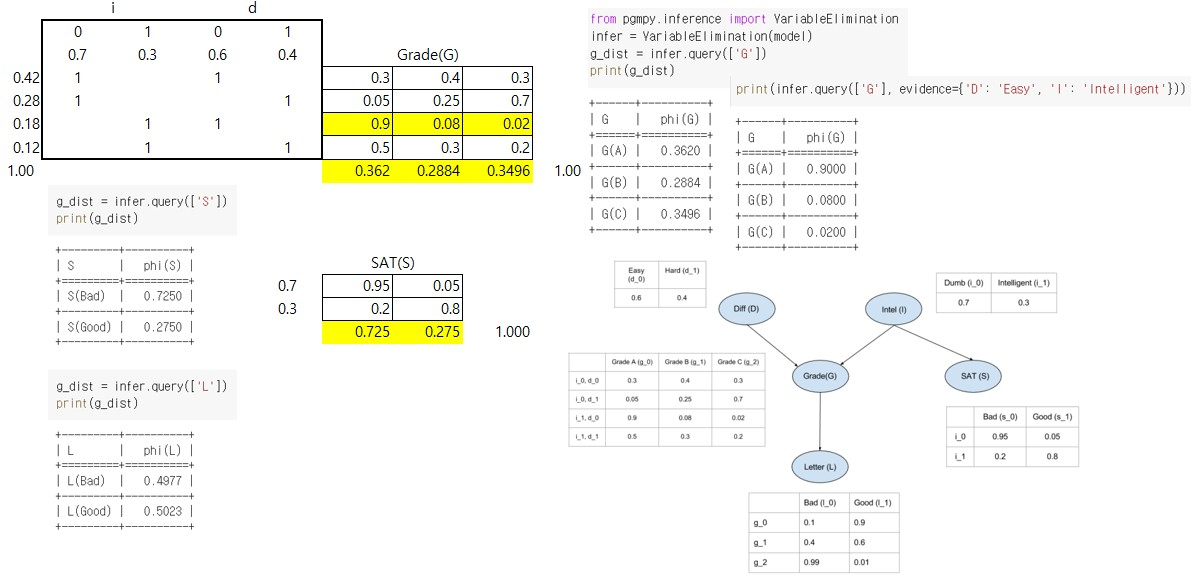

In [15]:
from IPython.display import Image
width=1000; height=1000
dir_path = r'D:\Baysian model\img'
Image(filename=dir_path + '/variational inference.png', width=width, height=height)

## 2.1.4.2. Predicting values from new data points

In [16]:
print(infer.query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent'}))

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.9000 |
+------+----------+
| G(B) |   0.0800 |
+------+----------+
| G(C) |   0.0200 |
+------+----------+


In [17]:
infer.map_query(['G'])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'G': 'A'}

In [18]:
infer.map_query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'A'}

In [19]:
infer.map_query(['G'], evidence={'D': 'Easy', 'I': 'Dumb'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'B'}

In [20]:
infer.map_query(['G'], evidence={'D': 'Hard', 'I': 'Intelligent'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'A'}

In [21]:
infer.map_query(['G'], evidence={'D': 'Hard', 'I': 'Dumb'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'C'}

In [22]:
infer.map_query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent', 'L': 'Good', 'S': 'Good'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'G': 'A'}

# End